In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
data=pd.read_csv('letterdata.csv')

In [3]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
def getaccuracy(testset,prediction):
    correct=0
    for x in range(len(testset)):
        if(testset[x]==prediction[x]):
            correct=correct+1
    return (correct/float(len(testset)))*100.0

In [4]:
data.isnull().values.any()

False

In [5]:
#split data

In [6]:
X,Y=np.array(data)[:,1:16],np.array(data.letter)[:]

In [7]:
X_train=X[:16000,:]
X_test=X[16001:,:]
Y_train=Y[:16000]
Y_test=Y[16001:]

In [8]:
#build the model

In [9]:
clf=svm.SVC(gamma=0.025,C=3)

In [10]:
clf.fit(X_train,Y_train)

SVC(C=3, gamma=0.025)

In [11]:
Y_predict=clf.predict(X_test)

In [12]:
getaccuracy(Y_test,Y_predict)

96.07401850462615

In [13]:
y_g=(np.column_stack([Y_test,Y_predict]))

In [14]:
print(y_g)

[['N' 'N']
 ['V' 'V']
 ['I' 'I']
 ...
 ['T' 'T']
 ['S' 'S']
 ['A' 'A']]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [16]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [17]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=10).fit(X, y)

In [18]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

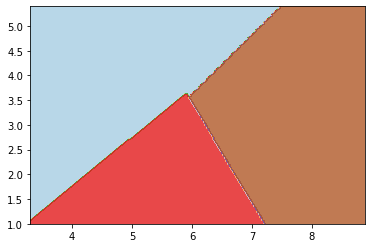

In [6]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

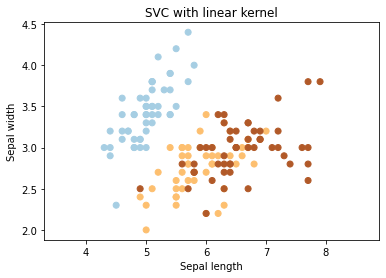

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

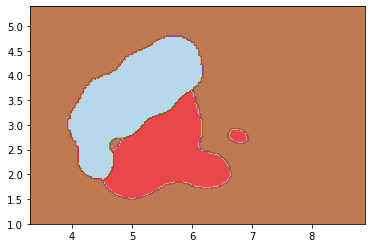

In [9]:
svc = svm.SVC(kernel='rbf', C=1,gamma=10).fit(X, y)
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

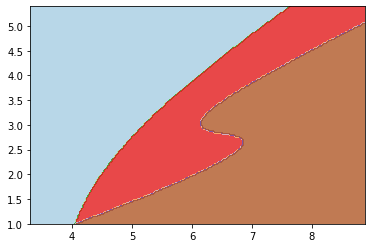

In [16]:
svc = svm.SVC(kernel='poly', C=1,gamma=100).fit(X, y)
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)